<a href="https://colab.research.google.com/github/akshatagrawal1998/Deep-Learning/blob/main/Fine_Tuning_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine Tuning Transfer Learning

Here we not only train Dense layers but also few convolutional layers also so that our model can classify some labels which are very much different from the ones on which the used pretrained model was trained.

# Feature extraction Transfer Learning

In Feature extraction, we only train Dense layers (for classification purpose) and the convolution layers (which are used to detect features) remains same. It is basically used when we want to classify similar labels on which the pretrained model is built (basic features of 1000 classes of ImageNet Dataset remains same) like in classification of human vs monkey - primary features like (eyes, ear, nose, mouth, etc) are very similar. So in such cases we need not to build a whole new CNN. Pretrained model can be used as the primary features are similar. So Feature extraction Transfer Learning is used in such cases.

# Data Reference link 
- https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [33]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [34]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [35]:
# unzipping the file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [36]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [37]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [38]:
# here we are setting block 5 layer to be trainable

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1': # block 5 layer
    set_trainable = True # set it's training to true
  if set_trainable: # set each layer training = True inside block 5
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

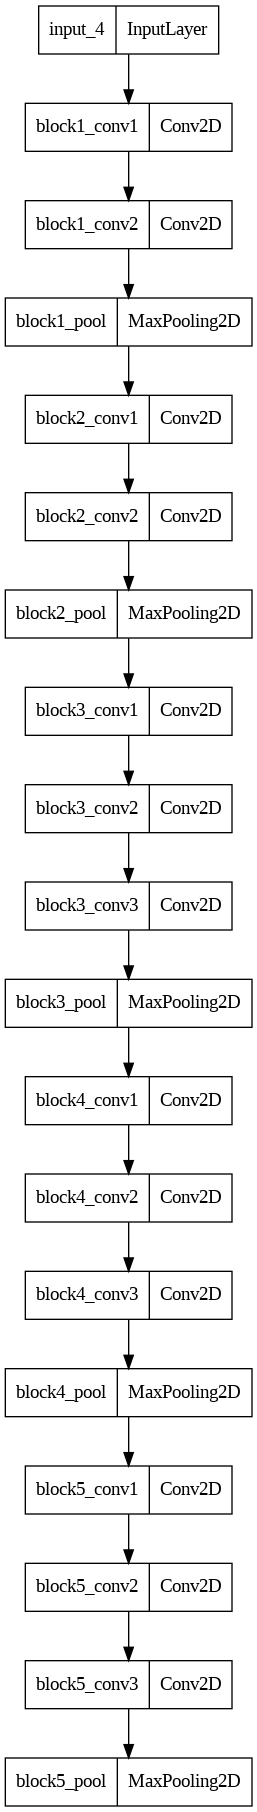

In [48]:
from keras.utils import plot_model
plot_model(conv_base)

In [40]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

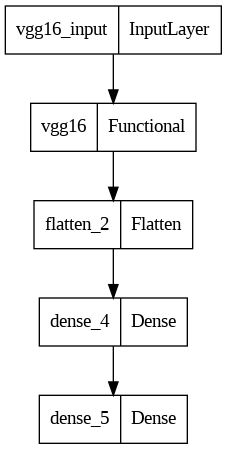

In [47]:
from keras.utils import plot_model
plot_model(model)
# plot_model(model, show_shapes=True)

In [41]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [42]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [43]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),  # optimizer with Learning rate (it should be quite less when doing Fine tuning)
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [44]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 64s 100ms/step - loss: 1.0250 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 72s 115ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 63s 100ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 72s 115ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 64s 102ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.5000


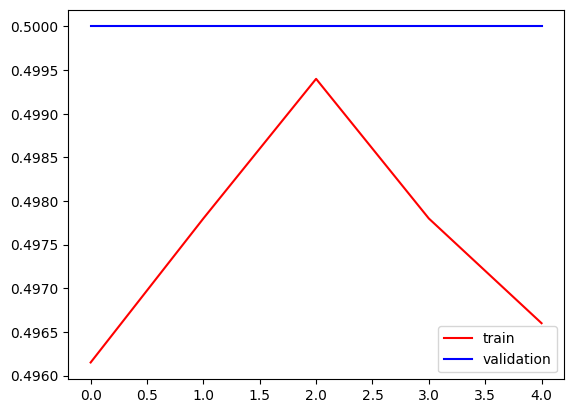

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

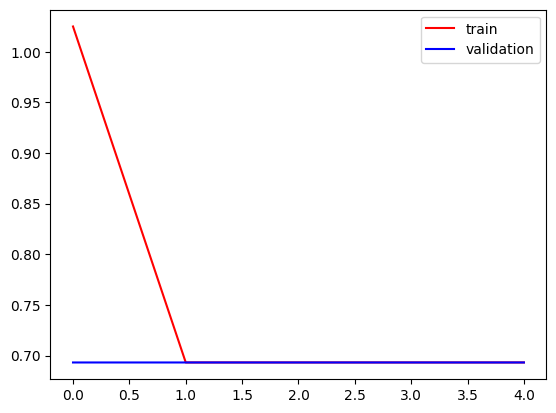

In [46]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()